In [ ]:
import pandas as pd

import numpy as np

import sklearn as skl

from mpl_toolkits.mplot3d import Axes3D

import scipy as sp

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/My Drive/A01705205_EtiquetasNutrimentales.csv'

In [ ]:
df1 = pd.read_csv(path1, index_col=0)

In [ ]:
df1.head()

,Nombre,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg),Fuente
Fecha,,,,,,,
16/08/21,Omelette de claras con panela y avena instantanea,354.0,22.3,20.5,22.9,961.0,Myfitnesspal y etiqueta nutrimental
NaN,Manzana verde,40.0,10.5,0.0,0.0,0.0,Myfitnesspal
NaN,Almendras,75.0,0.3,8.3,0.3,0.2,Myfitnesspal
NaN,Ensalada con pollo y panela,438.0,14.0,22.0,52.0,572.0,Myfitnesspal
NaN,Toast con plátano y crema de almendras,157.0,28.8,3.7,4.6,125.0,Myfitnesspal y etiqueta nutrimental


In [ ]:
df1.columns

Index(['Nombre', 'Calorias (kcal)', 'Carbohidratos (g)', 'Lípidos (g)',
       'Proteína (g)', 'Sodio (mg)', 'Fuente'],
      dtype='object')

In [ ]:
list_to_drop=['Nombre', 'Calorias (kcal)', 'Fuente']

X= df1.drop(list_to_drop, axis=1)

In [ ]:
print(X)

            Carbohidratos (g)  Lípidos (g)  Proteína (g)  Sodio (mg)
Fecha                                                               
16/08/21                 22.3         20.5          22.9       961.0
NaN                      10.5          0.0           0.0         0.0
NaN                       0.3          8.3           0.3         0.2
NaN                      14.0         22.0          52.0       572.0
NaN                      28.8          3.7           4.6       125.0
...                       ...          ...           ...         ...
NaN                      16.6         18.8          61.2      1095.8
NaN                      52.8         27.6           5.6       388.0
11/27/2021               66.0          4.0           9.8       355.0
NaN                      14.0         22.0          52.0       572.0
NaN                      33.8         14.9          12.4        27.4

[337 rows x 4 columns]


In [ ]:
y=df1['Calorias (kcal)']

In [ ]:
y.head()

Fecha
16/08/21    354.0
NaN          40.0
NaN          75.0
NaN         438.0
NaN         157.0
Name: Calorias (kcal), dtype: float64

En los modelos Machine Learning supervisado, como es el caso de la regresión, se deben separar los datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head()

,Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
Fecha,,,,
NaN,16.6,18.8,61.2,1095.8
NaN,14.6,14.5,11.5,966.0
9/19/2021,10.3,11.8,18.9,518.0
NaN,21.9,6.5,1.5,2.0
NaN,16.6,18.8,61.2,1095.8


Ahora creamos el modelo, si bien estamos usando un modelo de regresión lineal, podemos usar cualquier otro modelo de regresión de sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

LR = LinearRegression()

xgbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=1, random_state=0).fit(x_train, y_train)

clf = linear_model.TweedieRegressor()

neigh = KNeighborsRegressor(n_neighbors=2)

LR.fit(x_train,y_train)
xgbr.fit(x_train, y_train)
clf.fit(x_train, y_train)
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_prediction_lr = LR.predict(x_test)
y_prediction_xgb = xgbr.predict(x_test)
y_prediction_clf = clf.predict(x_test)
y_prediction_neigh = neigh.predict(x_test)


y_prediction_lr
y_prediction_xgb
y_prediction_clf
y_prediction_neigh



array([291. , 305. , 149.5, 484. , 484. , 280. , 247. , 364. , 438. ,
       122. , 124. , 206. , 188. , 211. , 223. , 484. , 157. , 312. ,
       291. , 247. , 157. , 529. , 335. , 205. , 124. , 392. , 247. ,
       122. , 223. , 305. , 223. , 280. , 600. , 529. , 529. , 312. ,
       122. , 438. , 334. , 438. , 155.5, 157. , 364. , 438. , 247. ,
       364. , 334. ,  85. , 141. , 334. , 291. , 205. , 335. , 124. ,
       373.4, 484. , 280. , 335. , 392. , 334. , 438. , 334. , 211. ,
       206. , 223. , 438. , 304.7, 334. ])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score_lr=r2_score(y_test, y_prediction_lr)
score_xgb=r2_score(y_test, y_prediction_xgb)
score_clf=r2_score(y_test, y_prediction_clf)
score_neigh=r2_score(y_test, y_prediction_neigh)

print('r2 score de la rl es ',score_lr)
print('r2 score de la xgb es ',score_xgb)
print('r2 score de la clf es ',score_clf)
print('r2 score de la neigh es ',score_neigh)

print('mean_sqrd_error (lr) is==',mean_squared_error(y_test,y_prediction_lr))
print('mean_sqrd_error (xgb) is==',mean_squared_error(y_test,y_prediction_xgb))
print('mean_sqrd_error (clf) is==',mean_squared_error(y_test,y_prediction_clf))
print('mean_sqrd_error (neigh) is==',mean_squared_error(y_test,y_prediction_neigh))

print('root_mean_squared error (lr) of is==',np.sqrt(mean_squared_error(y_test,y_prediction_lr)))
print('root_mean_squared error (xgb) of is==',np.sqrt(mean_squared_error(y_test,y_prediction_xgb)))
print('root_mean_squared error (clf) of is==',np.sqrt(mean_squared_error(y_test,y_prediction_clf)))
print('root_mean_squared error (neigh) of is==',np.sqrt(mean_squared_error(y_test,y_prediction_neigh)))

r2 score de la rl es  0.9499925975906235
r2 score de la xgb es  0.9810359488198505
r2 score de la clf es  0.9496119091857945
r2 score de la neigh es  0.9922047201265707
mean_sqrd_error (lr) is== 721.0926264667784
mean_sqrd_error (xgb) is== 273.4562647745194
mean_sqrd_error (clf) is== 726.5820458022672
mean_sqrd_error (neigh) is== 112.40573529411765
root_mean_squared error (lr) of is== 26.853167903746076
root_mean_squared error (xgb) of is== 16.536513077868605
root_mean_squared error (clf) of is== 26.955185879571804
root_mean_squared error (neigh) of is== 10.602157105708143


Ahora hacemos un taller donde:

1. Averiguamos los coeficientes del modelo.

2. Graficar de apares las variables independientes contra la variable dependiente.

3. Determinar con un f test si el modelo es significativo.

Coeficientes LR


In [ ]:
coeficiente_lr=list(zip(X.columns, LR.coef_.flatten(), ))
for i in coeficiente_lr:
  print(i)

('Carbohidratos (g)', 4.15524180117307)
('Lípidos (g)', 8.250283608931907)
('Proteína (g)', 4.031006583872516)
('Sodio (mg)', 0.011378310343044262)


Coeficientes clf

In [ ]:
coeficiente_clf=list(zip(X.columns, clf.coef_.flatten(), ))
for i in coeficiente_clf:
  print(i)

('Carbohidratos (g)', 4.153824894385708)
('Lípidos (g)', 8.05713259998918)
('Proteína (g)', 4.024923985427535)
('Sodio (mg)', 0.012795113962692341)


Graficar de apares las variables independientes contra la variable dependiente.

In [ ]:
carbohidratos=df1['Carbohidratos (g)']
lipidos=df1['Lípidos (g)']
proteina=df1['Proteína (g)']
sodio=df1['Sodio (mg)']


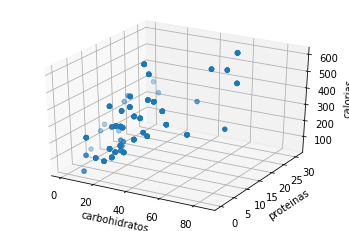

In [ ]:
TRESD = plt.figure().gca(projection='3d')
TRESD.scatter(carbohidratos, lipidos, y)
TRESD.set_xlabel('carbohidratos')
TRESD.set_ylabel('proteinas')
TRESD.set_zlabel('calorias')
plt.show()

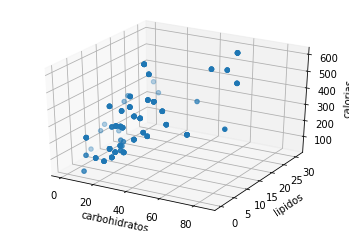

In [ ]:
TRESD = plt.figure().gca(projection='3d')
TRESD.scatter(carbohidratos, lipidos, y)
TRESD.set_xlabel('carbohidratos')
TRESD.set_ylabel('lipidos')
TRESD.set_zlabel('calorias')
plt.show()

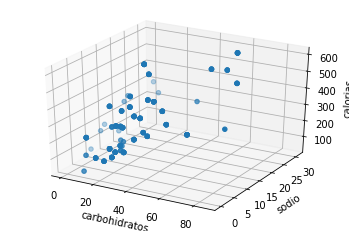

In [ ]:
TRESD = plt.figure().gca(projection='3d')
TRESD.scatter(carbohidratos, lipidos, y)
TRESD.set_xlabel('carbohidratos')
TRESD.set_ylabel('sodio')
TRESD.set_zlabel('calorias')
plt.show()

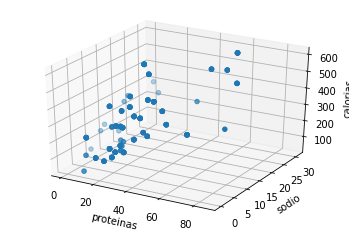

In [ ]:
TRESD = plt.figure().gca(projection='3d')
TRESD.scatter(carbohidratos, lipidos, y)
TRESD.set_xlabel('proteinas')
TRESD.set_ylabel('sodio')
TRESD.set_zlabel('calorias')
plt.show()

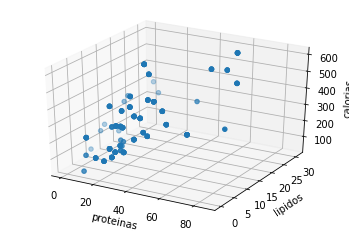

In [ ]:
TRESD = plt.figure().gca(projection='3d')
TRESD.scatter(carbohidratos, lipidos, y)
TRESD.set_xlabel('proteinas')
TRESD.set_ylabel('lipidos')
TRESD.set_zlabel('calorias')
plt.show()

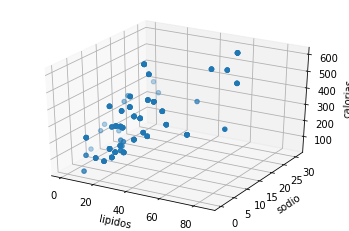

In [ ]:
TRESD = plt.figure().gca(projection='3d')
TRESD.scatter(carbohidratos, lipidos, y)
TRESD.set_xlabel('lipidos')
TRESD.set_ylabel('sodio')
TRESD.set_zlabel('calorias')
plt.show()

Determinar con un f test si el modelo es significativo.

In [ ]:
alpha=0.5
def f_test(a,b):
  a=np.array(a)
  b=np.array(b)
  f=np.var(a, ddof=1)/np.var(b, ddof=1)
  dfn=a.size-1
  dfd= b.size-1
  p= 1-sp.stats.f.cdf(f, dfn, dfd)
  return f, p

f_test(X, y)

(6.913946805049261, 1.1102230246251565e-16)